In [1]:
import numpy as np
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.models import load_model
from keras import regularizers

Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1),kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(2048, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [3]:
model.load_weights("./model/model.h5")

In [4]:
emoji_dict = {0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

In [5]:
from PIL import Image
import imageio
import numpy as np
import matplotlib.pyplot as plt


def predict(image):
    image1 = Image.fromarray(image)
    image2 = image1.resize((48, 48), Image.ANTIALIAS)
    img = np.asarray(image2)
    img = img.reshape((48,48,1))
    img = img * 1. / 255
    img = img[None,:,:,:]
    emotion = np.argmax(model.predict(img))
    return imageio.imread('emojis/'+emoji_dict[emotion]+'.png')[:,:,0:3]

In [6]:
import cv2 
haar_file = 'haarcascade_frontalface_default.xml'

(width, height) = (48, 48)     
  
face_cascade = cv2.CascadeClassifier(haar_file) 
webcam = cv2.VideoCapture(0)  
counter=0
while True: 
    
        if not webcam.isOpened():
            print("Can't open camera")
            webcam.release()
            break
        (ret, im) =  webcam.read()
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            webcam.release()
            break
        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 
        faces = face_cascade.detectMultiScale(gray, 1.1, 4,minSize=(100,100) ) 
        numpy_h = im
        for (x, y, w, h) in faces: 
            cv2.rectangle(im, (x, y), (x + w, y + h), (255, 0, 0), 2) 
            face = gray[y:y + h, x:x + w] 
            pr = predict(face)
            predict_resize = cv2.resize(pr,(im.shape[1],im.shape[0]))
            numpy_h = np.hstack((im, predict_resize))
            if counter %10==0:
                cv2.imwrite(f"./myface/face{counter}.png",face)
                
            counter = counter + 1
        cv2.imshow('Frame', numpy_h)
        if cv2.waitKey(1) & 0xFF == ord('q'): 
            break
         
        
cv2.destroyAllWindows()
webcam.release()

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


def predict2(image_path):
    image = Image.open(image_path)
    image2 = image.resize((48, 48), Image.ANTIALIAS)
    img = np.asarray(image2)
    img = img[:,:,0]
    img = img.reshape((48,48,1))
    img = img * 1. / 255
    img = img[None,:,:,:]
    emotion = np.argmax(model.predict(img))
    
    a = plt.figure()
    a = a.add_subplot(1, 2, 1)
    imgplot = plt.imshow(image)
    a.set_title(emoji_dict[emotion])
    a.axes.get_xaxis().set_visible(False)
    a.axes.get_yaxis().set_visible(False)
    plt.show()

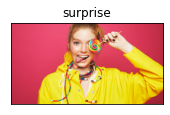

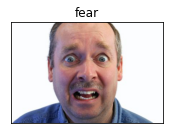

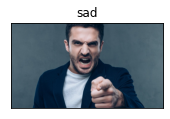

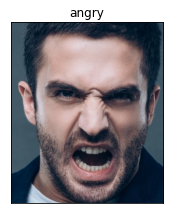

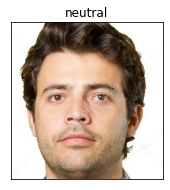

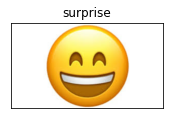

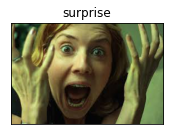

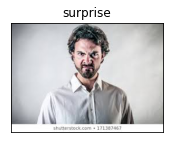

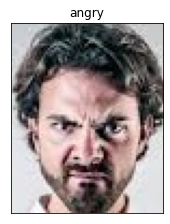

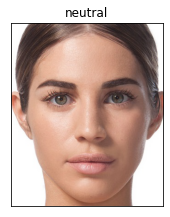

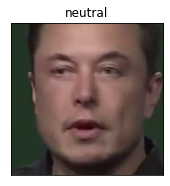

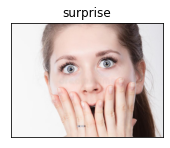

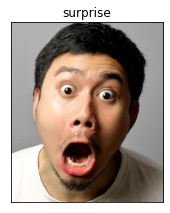

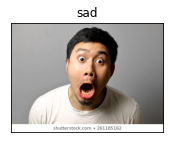

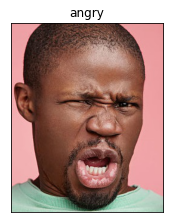

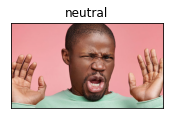

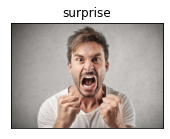

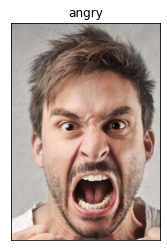

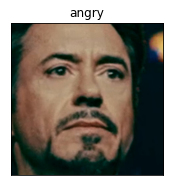

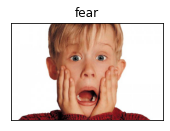

In [9]:
import os
dir = "test/"

for filename in os.listdir(dir):
    predict2(dir+filename)


As we can see if we try to predict images with not just face our model does not give good result that because our training sets are contains only face images so if we crop faces from images we get better result.